In [11]:
# %pip install scipy
# %pip install matplotlib
# %pip install SpeechRecognition
# %pip install wave
# %pip install librosa
# %pip install ipython

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Conversão para .WAV

In [33]:
# import required modules
# import subprocess

# # # # convert to wav file
# subprocess.call(['ffmpeg', '-i', 'moli_assovio_2.ogg',
#                   'moli_assovio_2.wav'])

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

0

Conversão audios estereos para mono

Text(0, 0.5, 'Amplitute')

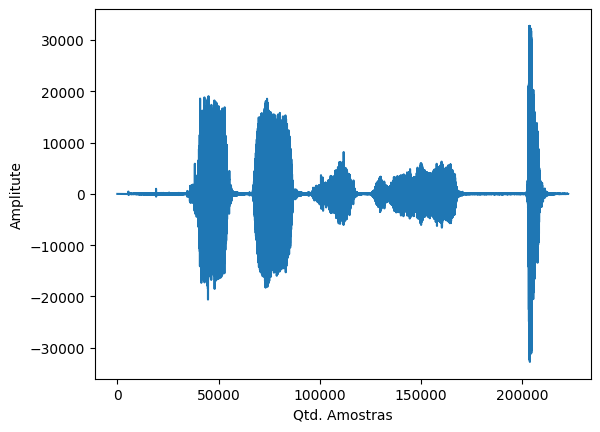

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav

rate, data = wav.read('assovio.wav')

# somando os dois canais e normalizando (passando de estereo para mono)
# data = np.sum(data, axis=1) / 2 
plt.plot(data)
plt.xlabel('Qtd. Amostras')
plt.ylabel('Amplitute')

Converter qtd. amostra para tempo (Eixo X)

Text(0, 0.5, 'Amplitute')

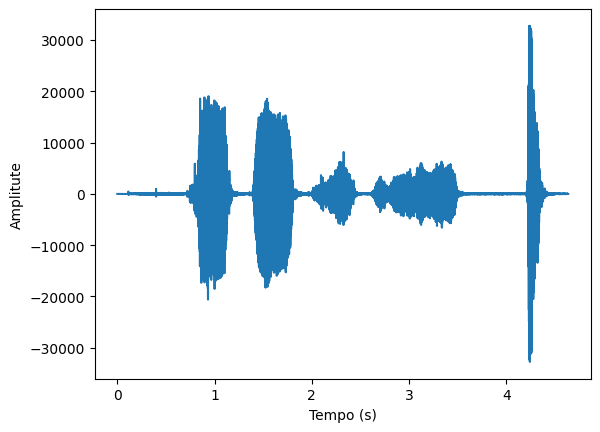

In [25]:
# encontrar o comprimento (total de amostras)
n = len(data)

# Frequencia de amostragem por sinal (quantas amostras por segundo)
fs = 48000 #48khz (audio) ou 44100 44.1khz (padrao spotify apple music) 
# https://emastered.com/pt/blog/sample-rate-for-audio#:~:text=A%20melhor%20taxa%20de%20amostragem,da%20sua%20onda%20sonora%20original.


T = 1/fs # tempo entre uma amostra e outra (inverso entre uma amostra e outra)

t = np.arange(0,n/fs,T) # (vetor de tempo) começa em 0seg, vai até o valor final do comprimento / frequencia de amostragem, e vai andando de T em T (valor calculado na variavel T)

plt.plot(t, data)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitute')

Transformada de Fourier

111307

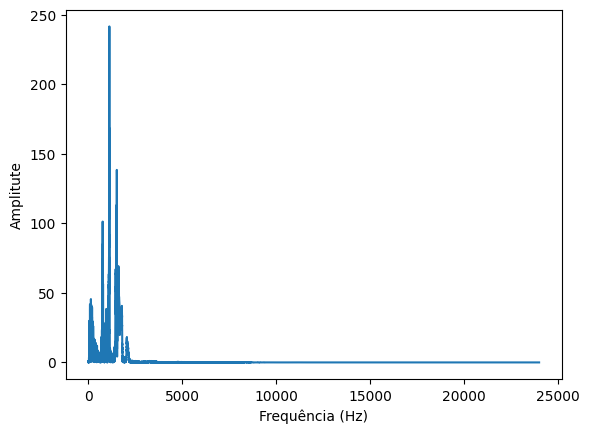

In [26]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# saindo de segundos e indo para hz
f = fftfreq(n,T)

# numero complexo (transformada)
transf = fft(data)

# módulo - para tirar os números complexos (módulo)
transf = np.abs(transf)

plt.plot(f[f > 0],transf[f > 0]*1/n) # mascara para pegar apenas os sinais com frequencias maiores que zeros e normalização o eixo vertical (dividir a transformada pelo tamanho do sinal)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Amplitute')


# plt.ylim([0, 50])
# plt.xlim([0, 30])
len(transf[f > 0]*1/n)


In [25]:
# import pandas as pd

# df_transf = pd.DataFrame(transf[f > 0]*1/n)
# df_transf.columns = ['Amplitude']
# df_valores = pd.DataFrame()

# cont = 0
# hashtags = []
# f_hashtag = ''

# for i in range(0, int(df_transf['Amplitude'].max()) + 100, 10) :
#    cont = 0
#    for j in df_transf['Amplitude']:
#       if j > i :  
#          cont+=1
#    # print(f'Número de valores de Amplitude maiores que {i} e menores que {i+100}: {cont}')
#    if (cont > 0):
#       hashtag = f"{i}{i+100}{cont}"
#       hashtags.append(hashtag)
   
# f_hashtag = ' '.join(hashtags)

# print(f'Hashtag para essa música: {f_hashtag}')


In [26]:
# chunksize = 1024 # tamanho que o array será dividido (cada chunk tem esse tamanho) 1024 elementos
# chunks = int(len(transf) / chunksize)
# result = []

# for j in range(chunks):
#     arraychunk = np.zeros(chunksize) # criação de novo array preenchido com zero
#     for i in range(chunksize):
#         arraychunk[i] = transf[(j * chunksize) + i] # mapeando a porção do array transf correspondente ao pedaço j no arraychunk
#     result.append(arraychunk)
# print(result[0][0])

In [27]:
# ranges = np.arange(40, 301, 10)  # Intervalos de 10 em 10 Hz
# fuzfactor = 1  # Fator de ajuste menor para mais precisão

# # Inicialização dos highscores e points para os intervalos de interesse
# highscores = [0] * len(ranges)
# points = [0] * len(ranges)

# # Processamento da transformada completa
# for freq in range(40, 301):
#     if transf[freq] > 0:
#         mag = np.log(np.abs(transf[freq]) + 1)
#         i = 0
#         while i < len(ranges) and ranges[i] < freq:
#             i += 1
#         if i < len(ranges) and mag > highscores[i]:
#             highscores[i] = mag
#             points[i] = freq

# # Cálculo da hashtag única com mais detalhes
# h = 0
# for i in range(len(points)):
#     h += (points[i] - (points[i] % fuzfactor)) * (10 ** (len(points) - i - 1))

# print(f"Hashtag: {h}")

# # Extraindo os pontos individuais para leitura
# h_copy = h
# extracted_points = []

# for i in range(len(points)):
#     factor = 10 ** (len(points) - i - 1)
#     point = (h_copy // factor) * fuzfactor
#     extracted_points.append(point)
#     h_copy %= factor

# print(f"Frequencias: {extracted_points}")


In [52]:
from IPython.display import Audio
import librosa
# https://willdrevo.com/fingerprinting-and-audio-recognition-with-python/


fname = 'moli_assovio_2.wav'
y, sr = librosa.load(fname, sr=None, mono=True)
Audio(y, rate= sr)

S = librosa.stft(y, n_fft=2048, hop_length=512, win_length=1024)
S = np.abs(S)

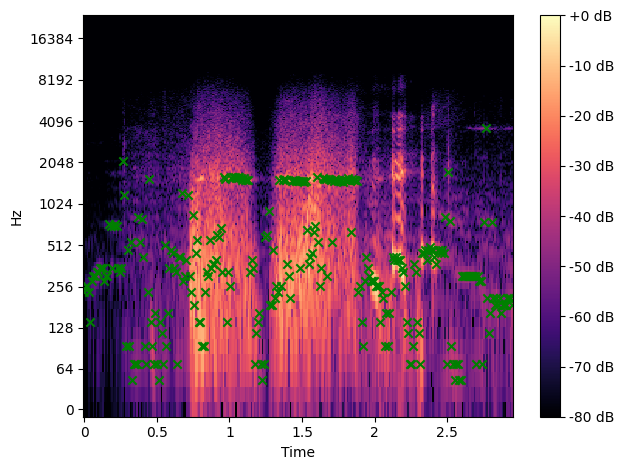

In [53]:
import librosa.display as dp

dp.specshow(librosa.amplitude_to_db(S, ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

# Encontrar os índices dos valores máximos
max_indices = np.argwhere(S == np.max(S, axis=0))

# Obter os tempos e as frequências correspondentes
times = librosa.frames_to_time(max_indices[:, 1], sr=sr)
frequencies = librosa.fft_frequencies(sr=sr)[max_indices[:, 0]]

# Adicionar os marcadores verdes no gráfico
plt.scatter(times, frequencies, marker='x', color='green', label='Max Values')